In [1]:
import filenistview 
import random
import pickle
import numpy as np
import scipy.fft


import matplotlib.pyplot as plt

def trap_integral(spec):
    n = len(spec)
    return 0.5*spec[0] + 0.5*spec[n-1] + sum(spec[1:n-1])

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y

def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / math.sqrt((a*a).sum() * (b*b).sum());
    return r

def ffourier(orig):
    k = scipy.fft.fft2(orig.astype(np.float))
    k = scipy.fft.fftshift(k)
    return k

def custom_mean(lofspecs, num = 41):
    if (len(lofspecs) == 0):
        return np.zeros(num)
    lofspecs = np.array(lofspecs)
    ret_spec = np.zeros(num)
    for a in range(num):
        ret_spec[a] = np.mean(lofspecs[:, a])
    return ret_spec

def custom_med(lofspecs, num = 41):
    if (len(lofspecs) == 0):
        return np.zeros(num)
    lofspecs = np.array(lofspecs)
    ret_spec = np.zeros(num)
    for a in range(num):
        ret_spec[a] = np.median(lofspecs[:, a])
    return ret_spec

def print_meanv(speclist):
    speclist = np.array(speclist)
    for a in range(41):
        print(np.mean(speclist[:, a]))
        
def print_lengths(dct, hide = False):
    for key in dct.keys():
        if hide:
            print(len(dct[key]))
        else:
            print(key, len(dct[key]))

In [2]:
## original datasets
# original dataset 
#nvldata = filenistview.FileHandlerNVL.load("BSCOData/OPT35K/drift-corrected 70824A05, Qx=(136,132).nvl")

# dataset 2
#nvldata = filenistview.FileHandlerNVL.load("BSCOdata/UD25K/drift-corrected 0705C022 dIdV, Qx=(51,46).nvl")

# dataset 3
#nvldata = filenistview.FileHandlerNVL.load("BSCOdata/UD32K/1016B012 dIdV, cropcorner=(112,7), linesubtract, filtered N=5.nvl")

# dataset 4
# used for folder 8_7
#nvldata = filenistview.FileHandlerNVL.load("BSCOdata/OD15K/drift-corrected 70213M00_5K dIdV, Qx=(48,-3).nvl")

# used for folder 8_6
#nvldata = filenistview.FileHandlerNVL.load("BSCOdata/OD15K/Hudson_Bi2201_OD15K_Run80/drift-corrected 0306Q008 dIdV, Qx=(44,22).NVL")

# dataset 6
nvldata = filenistview.FileHandlerNVL.load("BSCOdata/UD75K/drift-corrected 30107A00.1FL Cropped, Qx=(26,25).NVL")

# dataset 7
#nvldata = filenistview.FileHandlerNVL.load("BSCOdata/Hoffman2212/drift-corrected 2010_08_26_B00094.3ds LIY Cropped, Qx=(78,72).NVL")

## create data
nvldata = np.asarray(nvldata)
norm_data = nvldata / np.max(nvldata)

energies = nvldata.shape[1]
rows = nvldata.shape[2]
columns = nvldata.shape[3]

nvl_modified = np.zeros((energies, rows, columns))

for i in range(rows):
    for j in range(columns):
        nvl_modified[:,i,j] = norm_data[0,:,i,j]

FileHandler <class 'filenistview.FileHandlerNVL'>: Load file BSCOdata/UD75K/drift-corrected 30107A00.1FL Cropped, Qx=(26,25).NVL
IDL Save file is compressed
 -> expanding to C:\Users\elw81\AppData\Local\Temp\tmp_tnv0jmn.sav
--------------------------------------------------
Date: Sat Mar 05 20:26:19 2011
User: Administrator
Host: STM
--------------------------------------------------
Format: 9
Architecture: x86
Operating System: Win32
IDL Version: 7.1
--------------------------------------------------
Successfully read 14 records of which:
 - 2 are of type VARIABLE
 - 1 are of type NOTICE
 - 7 are of type HEAP_DATA
 - 1 are of type HEAP_HEADER
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - savestructure [<class 'numpy.recarray'>]
 - saveversion [<class 'numpy.float32'>]
--------------------------------------------------


In [3]:
np.shape(nvl_modified)

(101, 120, 120)

In [29]:
# gapmap imports

# dataset 1 
#temp = filenistview.FileHandlerNVI.load("BSCOData/OPT35K/drift-corrected 70824A05_Eric_CombinedSmoothedGapMap.NVI")

# dataset 2
#temp = filenistview.FileHandlerNVI.load("BSCOData/UD25K/drift-corrected 0705C022 Tess gapmap, Qx=(51,46).nvi")

# dataset 3 
#temp = filenistview.FileHandlerNVI.load("BSCOData/UD32K/1016B012 gapmap simple posE max REWRITE.nvi")

# dataset 4
#temp = filenistview.FileHandlerNVI.load("BSCOData/OD15K/5K GapMap Smoothed.NVI")
#temp = filenistview.FileHandlerNVI.load("BSCOData/OD15K/Hudson_Bi2201_OD15K_Run80/drift-corrected 0306Q008_Eric_GapMapSmoothed.NVI")

# dataset 6 
temp = filenistview.FileHandlerNVI.load("BSCOData/UD75K/30107A00 liz gapmap.NVI")

gapmap = temp[0]
gapmap.shape

FileHandler <class 'filenistview.FileHandlerNVI'>: Load file BSCOData/UD75K/30107A00 liz gapmap.NVI
IDL Save file is compressed
 -> expanding to C:\Users\elw81\AppData\Local\Temp\tmpw4tr11ud.sav
--------------------------------------------------
Date: Sat Mar 05 19:07:54 2011
User: Administrator
Host: STM
--------------------------------------------------
Format: 9
Architecture: x86
Operating System: Win32
IDL Version: 7.1
--------------------------------------------------
Successfully read 11 records of which:
 - 4 are of type HEAP_DATA
 - 1 are of type VERSION
 - 1 are of type TIMESTAMP
 - 1 are of type NOTICE
 - 2 are of type VARIABLE
 - 1 are of type HEAP_HEADER
--------------------------------------------------
Available variables:
 - imagetosave [<class 'numpy.recarray'>]
 - saveversion [<class 'numpy.float32'>]
--------------------------------------------------
[b'\xc5'] <class 'bytes'> False


(128, 128)

In [64]:
# mat = 1
# halfdim = np.shape(nvl_modified)[0] // 2 + 1
# min_ind = 4
# max_ind = 18
# e_mult = 5
# dim = 468
# folder_name = "OPT11_10"

# mat = 2
# halfdim = np.shape(nvl_modified)[0] // 2 + 1
# min_ind = 5
# max_ind = 40
# e_mult = 1
# dim = 128
# folder_name = "UD25K8_6"

# mat = 4
# halfdim = np.shape(nvl_modified)[0] // 2 + 1
# min_ind = 5
# max_ind = 40
# e_mult = 1
# dim = 122
# folder_name = "OD8_6"

# mat = 4
# halfdim = np.shape(nvl_modified)[0] // 2 + 1
# min_ind = 2
# max_ind = 15
# e_mult = 2
# dim = 128
# folder_name = "OD8_7"

mat = 6
halfdim = np.shape(nvl_modified)[0] // 2 + 1
min_ind = 16
max_ind = 34
e_mult = 2
dim = 120
folder_name = "UD75K8_6"

gap_max = e_mult*(halfdim - min_ind - 1)
gap_min = e_mult*(halfdim - max_ind - 1)
print(halfdim, gap_max, gap_min)

51 68 32


In [22]:
gap_rank = np.zeros((dim, dim))
num_groups = 10
gap_bounds = [0,
              np.percentile(gapmap, 10),
              np.percentile(gapmap, 20), 
              np.percentile(gapmap, 30), 
              np.percentile(gapmap, 40), 
              np.percentile(gapmap, 50), 
              np.percentile(gapmap, 60), 
              np.percentile(gapmap, 70), 
              np.percentile(gapmap, 80), 
              np.percentile(gapmap, 90),
              np.percentile(gapmap, 100) + 1]
for i in range(dim):
    for j in range(dim):
        for index in range(num_groups):
            if (gapmap[i, j] >= gap_bounds[index] and gapmap[i, j] < gap_bounds[index+1]):
                gap_rank[i,j] = index

gap_groups = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

for i in range(dim):
    for j in range(dim):
        gap_groups[gap_rank[i,j]].append(nvl_modified[:, i, j])

NameError: name 'gapmap' is not defined

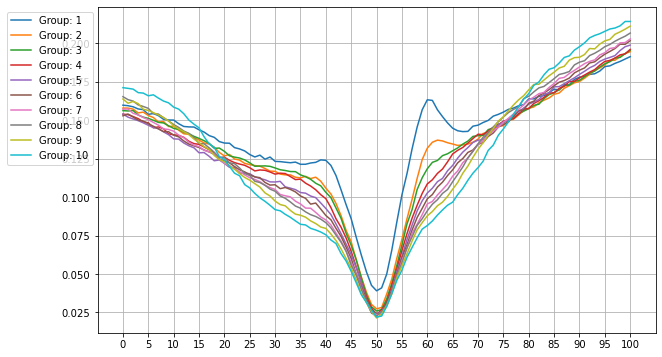

In [112]:
#plt.figure(figsize=(7,12))
plt.figure(figsize=(10,6))


for i in range(num_groups):
    cstr = "Group: " + str(i+1)
    #plt.plot(custom_mean(gap_groups[i], num = halfdim*2 -1) + (num_groups-i)*0.06, label = cstr)
    plt.plot(custom_mean(gap_groups[i], halfdim*2 -1), label = cstr)

    
plt.legend(bbox_to_anchor = (0, 1), loc = 'upper right')
plt.xticks(np.arange(0, halfdim*2 -1, halfdim // 10))
plt.grid(b= True)

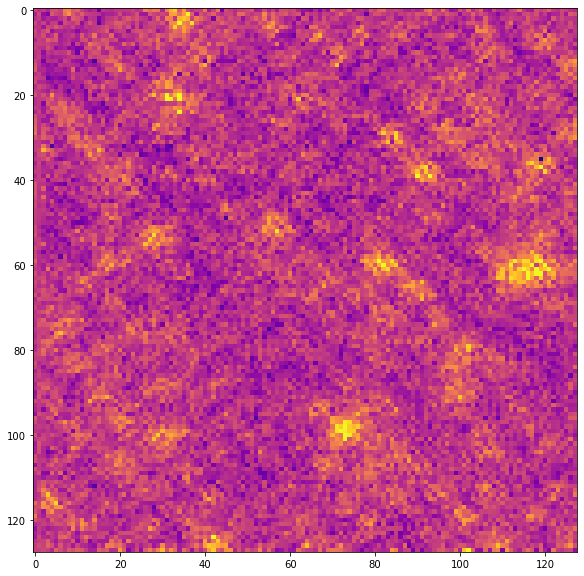

In [115]:
# 10mV layer
plt.figure(figsize=(10,10))
plt.imshow(nvl_modified[max_ind, :, :], cmap = "plasma", vmax = 0.3)

In [47]:
np.min(gapmap)

0.8683109

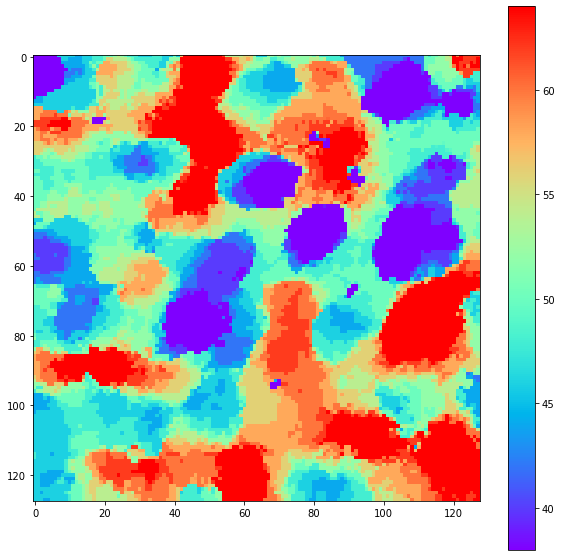

In [30]:
# gapmap
plt.figure(figsize=(10,10))
plt.imshow(gapmap, cmap = "rainbow", vmax = gap_max, vmin = gap_min)
plt.colorbar()

In [4]:
int20 = np.zeros((dim, dim))
for i in range(dim):
    for j in range(dim):
        int20[i,j] = trap_integral(nvl_modified[0:halfdim, i, j])

mean20 = np.mean(int20)

In [5]:
norm20 = np.zeros((halfdim, dim, dim))
for i in range(dim):
    for j in range(dim):
        factor = mean20 / int20[i,j]
        norm20[:, i, j] = nvl_modified[0:halfdim, i, j] * factor

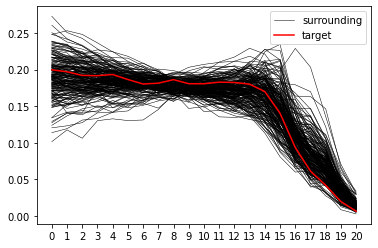

In [56]:
done = True
for i in range(100-7, 100+7):
    for j in range(100-7, 100+7):
        if (j == 100 and i == 100):
            continue
        if (done):
            plt.plot(norm20[:, i, j], color = "black", label = "surrounding", linewidth = 0.5)
            done = False
        else: plt.plot(norm20[:, i, j], color = "black", linewidth = 0.5)
plt.plot(norm20[:, 100, 100], color = "red", label = "target")
plt.xticks(np.arange(halfdim))
plt.legend()
plt.show()

In [6]:
zscores = np.zeros((halfdim, dim, dim))
margin = 7
for i in range(margin, dim-margin):
    for j in range(margin, dim-margin):
        for k in range(halfdim):
            a = norm20[k, (i-margin):(i+margin), (j-margin):(j+margin)]
            testing_mean = np.mean(a)
            zscores[k, i, j] = (norm20[k, i, j] - testing_mean) / np.std(a)

In [7]:
FOVzscores = np.zeros((halfdim, dim, dim))
for k in range(halfdim):
    a = norm20[k, :, :]
    testing_mean = np.mean(a)
    std = np.std(a)
    for i in range(dim):
        for j in range(dim):
            FOVzscores[k, i, j] = (norm20[k, i, j] - testing_mean) / std

In [65]:
max_index = np.zeros((dim, dim))
for i in range(margin, dim-margin):
    for j in range(margin, dim-margin):
        max_index[i,j] = np.argmax(zscores[min_ind:max_ind+1, i, j]) + min_ind

In [66]:
max_indexFOV = np.zeros((dim, dim))
for i in range(dim):
    for j in range(dim):
        max_indexFOV[i,j] = np.argmax(FOVzscores[min_ind:max_ind+1, i, j]) + min_ind

9.0


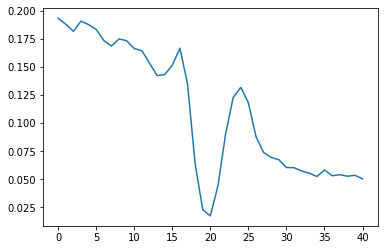

In [61]:
hi, hj = 50, 50
plt.plot(nvl_modified[:, hi, hj])
print(max_index[hi, hj])

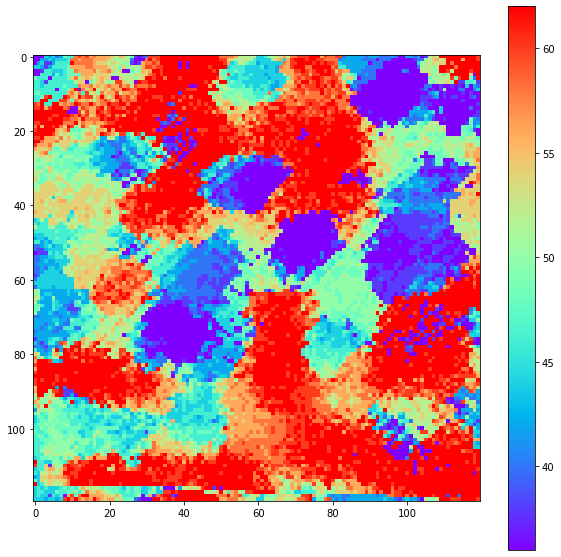

In [141]:
plt.figure(figsize = (10,10))
plt.imshow(e_mult*(halfdim - max_indexFOV - 1), cmap = "rainbow", vmax = gap_max, vmin = gap_min)
plt.colorbar()

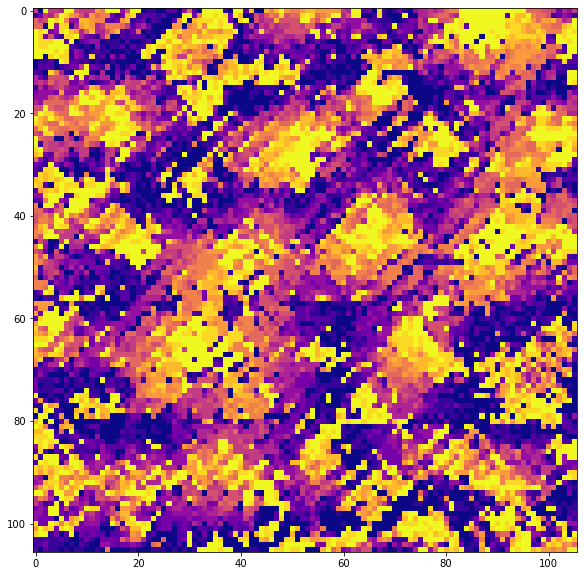

In [142]:
plt.figure(figsize = (10,10))
plt.imshow(max_index[margin:dim-margin, margin:dim-margin], cmap = "plasma")

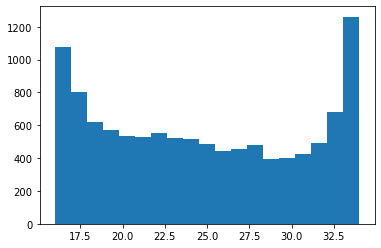

In [67]:
num_bins = max_ind - min_ind + 1
plt.hist(max_index[margin:dim-margin, margin:dim-margin].flatten(), bins = num_bins)
plt.show()

In [68]:
spec_list_collection = {}
for i in range(min_ind, max_ind + 1):
    spec_list_collection[i] = []
    
# IMPORTANT TO CHANGE
current_use = max_index

for i in range(margin, dim-margin):
    for j in range(margin, dim-margin):
        spec_list_collection[current_use[i, j]].append(nvl_modified[:, i, j])

In [69]:
print_lengths(spec_list_collection)

16 1076
17 805
18 619
19 569
20 533
21 527
22 550
23 523
24 519
25 484
26 446
27 458
28 478
29 392
30 399
31 424
32 491
33 682
34 1261


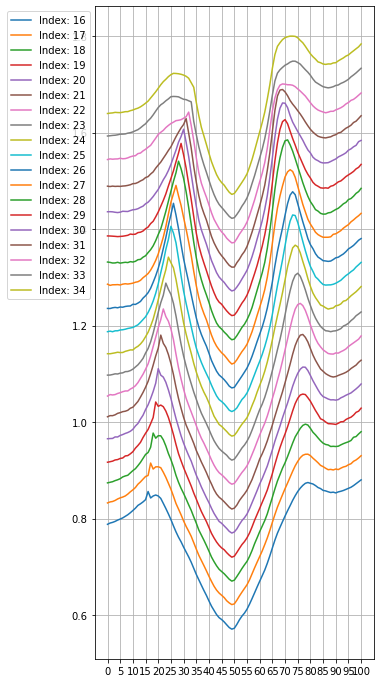

In [71]:
plt.figure(figsize=(5,12))

for i in range(min_ind, max_ind + 1):
    cstr = "Index: " + str(i)
    specc = custom_mean(spec_list_collection[i], num = halfdim*2 -1)
    xaxis = list(range(0, halfdim*2 - 1))
    
#     xaxis.pop(i)
#     specc = np.delete(specc, i)
    
    plt.plot(xaxis, specc + (i-5)*0.05, label = cstr)
    
plt.legend(bbox_to_anchor = (0, 1), loc = 'upper right')
plt.xticks(np.arange(0, halfdim*2 - 1, 5))
plt.grid(b= True)

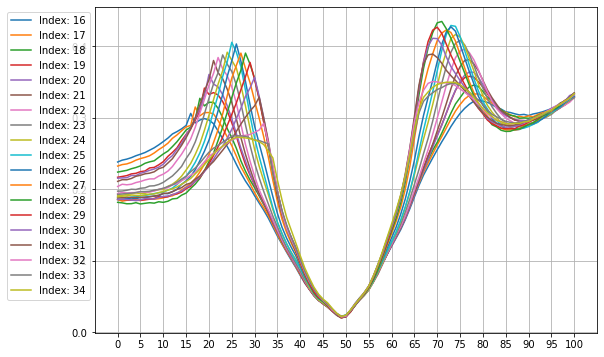

In [72]:
plt.figure(figsize=(9, 6))

for i in range(min_ind, max_ind + 1):
    cstr = "Index: " + str(i)
    specc = custom_mean(spec_list_collection[i], num = halfdim*2 -1)
    xaxis = list(range(0, halfdim*2 - 1))
    
#     xaxis.pop(i)
#     specc = np.delete(specc, i)

    plt.plot(xaxis, specc, label = cstr)
    
plt.legend(bbox_to_anchor = (0, 1), loc = 'upper right')
plt.xticks(np.arange(0, halfdim*2 - 1, 5))
plt.grid(b= True)

In [54]:
def plotit(thestuff, waterfall, howmany = halfdim*2 -1):
    if waterfall:
        plt.figure(figsize=(5,12))
        rr = 0.06
    else:
        plt.figure(figsize=(9,6))
        rr = 0

    gagh = list(thestuff.keys())
    for i in range(gagh[0], gagh[-1]+1):
        cstr = "Index: " + str(i)
        plt.plot(custom_mean(thestuff[i], howmany) + (i-min_ind)*rr, label = cstr)

    plt.legend(bbox_to_anchor = (0, 1), loc = 'upper right')
    plt.xticks(np.arange(0, halfdim*2 -1, 5))
    plt.grid(b= True)
    plt.show()

In [45]:
from copy import deepcopy
def find_right(spec, ind, smoothed = 0):
    hello = deepcopy(spec)
    if smoothed == 0:
        using = avgspecs
    elif smoothed == 1:
        using = s1_avgspecs
        hello[ind] = (hello[ind-1] + hello[ind+1]) / 2
    elif smoothed == 3:
        using = s3_avgspecs
        diff = (hello[ind+2] - hello[ind-2])/4
        hello[ind-1:ind+2] = [hello[ind-2] + diff, hello[ind-2] + diff*2, hello[ind-2] + diff*3]
    storage = np.zeros(halfdim)
    for i, item in enumerate(using):
        storage[i+min_ind] = (np.corrcoef(hello[:halfdim], item))[0, 1]
    return np.argmax(storage)

In [38]:
updatedz = zscores[min_ind:max_ind+1, :, :] - zscores[min_ind-1:max_ind, :, :] - zscores[min_ind+1:max_ind+2, :, :]

In [39]:
updatedz2 = []
for i in range(margin, dim - margin):
    for j in range(margin, dim - margin):
        inddd = int(max_index[i,j])
        updatedz2.append(zscores[inddd, i, j] - zscores[inddd+1, i, j] - zscores[inddd-1, i, j])

In [40]:
bound = np.percentile(updatedz2, 90)

In [42]:
zspectra = {}
for i in range(min_ind, max_ind + 1):
    zspectra[i] = []
for i in range(margin, dim - margin):
    for j in range(margin, dim - margin):
        inddd = int(max_index[i,j])
        if updatedz[inddd-min_ind, i, j] <= bound:
            zspectra[inddd].append(nvl_modified[:,i,j])

In [43]:
avgspecs =  []
s1_avgspecs = []
s3_avgspecs = []
taifanle = zspectra
for i in range(min_ind,max_ind+1-3):
    temp = custom_mean(taifanle[i], halfdim)
    avgspecs.append(temp)
    s1_temp = custom_mean(taifanle[i], halfdim) 
    s1_temp[i] = (temp[i-1] + temp[i+1])/2
    s1_avgspecs.append(s1_temp)
    s3_temp = custom_mean(taifanle[i], halfdim) 
    diff = (temp[i+2] - temp[i-2])/4
    s3_temp[i-1:i+2] = [temp[i-2] + diff, temp[i-2] + diff*2, temp[i-2] + diff*3]
    s3_avgspecs.append(s3_temp)

In [58]:
zremains = {}
zrevised = {}
reassigned_to = {}
for i in range(min_ind, max_ind + 1-3):
    zremains[i] = []
    zrevised[i] = []
    reassigned_to[i] = 0 
cc = 0
revised = np.zeros((dim, dim))
for i in range(margin, dim - margin):
    for j in range(margin, dim - margin):
        inddd = int(max_index[i,j])
        if inddd < 32 and updatedz[inddd-min_ind, i, j] <= bound:
            zrevised[inddd].append(nvl_modified[:,i,j])
            revised[i,j] = inddd
        else:
            if inddd < 32:
                zremains[inddd].append(nvl_modified[:,i,j])
            revised_ind = find_right(nvl_modified[:,i,j], inddd, 3)
            if revised_ind < min_ind:
                print(i, j)
            else: 
                zrevised[revised_ind].append(nvl_modified[:,i,j])
                revised[i,j] = revised_ind
                if inddd > 31:
                    reassigned_to[revised_ind] += 1
            cc +=1 
print(cc)

2827


In [49]:
reassigned_to

{19: 764,
 20: 175,
 21: 120,
 22: 91,
 23: 102,
 24: 173,
 25: 60,
 26: 195,
 27: 170,
 28: 208,
 29: 116,
 30: 443,
 31: 210}

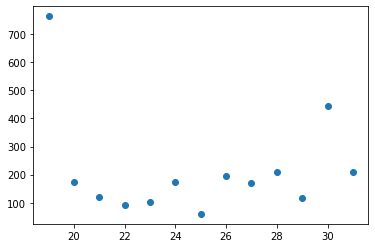

In [62]:
plt.scatter(reassigned_to.keys(), reassigned_to.values())

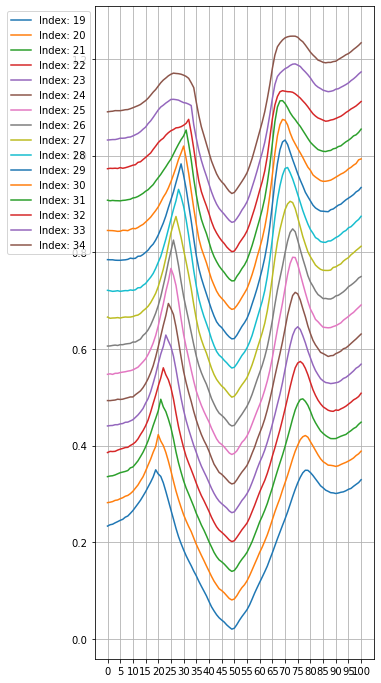

In [55]:
plotit(zspectra, True)

In [63]:
print_lengths(zrevised)
print_lengths(spec_list_collection)

19 2218
20 1119
21 878
22 768
23 701
24 742
25 589
26 684
27 657
28 732
29 562
30 899
31 687
19 1454
20 944
21 758
22 677
23 599
24 569
25 529
26 489
27 487
28 524
29 446
30 456
31 477
32 582
33 784
34 1461


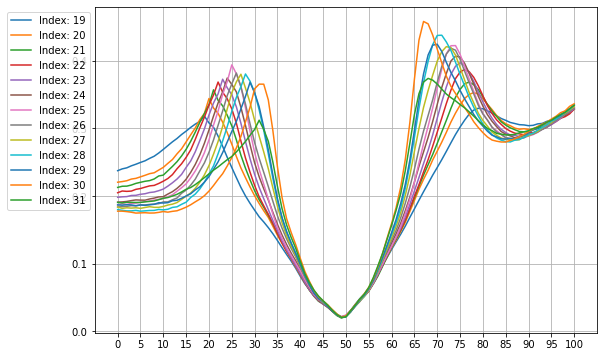

In [60]:
#plotit(zremains, False)
plotit(zrevised, False)

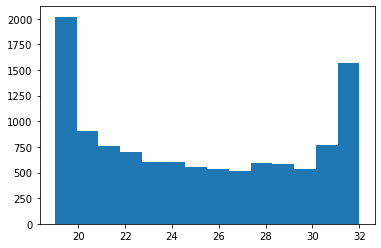

In [156]:
num_bins = max_ind - min_ind + 1 
plt.hist(revised[margin:dim-margin, margin:dim-margin].flatten(), bins = num_bins)
plt.show()

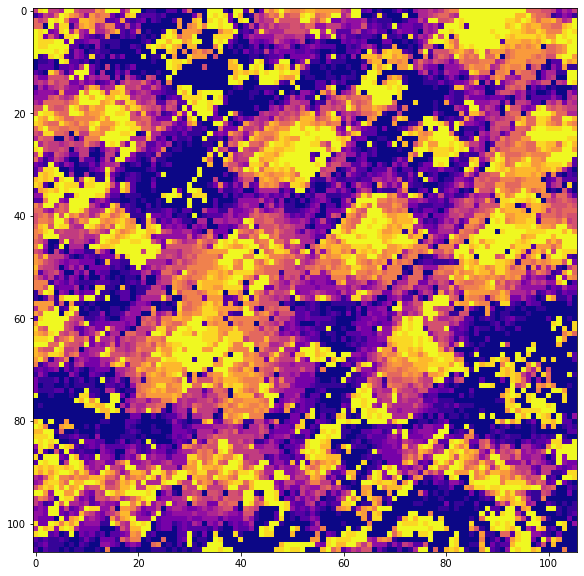

In [157]:
plt.figure(figsize = (10,10))
plt.imshow(revised[margin:dim-margin, margin:dim-margin], cmap = "plasma")

In [11]:
max_index.shape

(120, 120)

In [158]:
#final7 = np.zeros((dim,dim))
#sea3 = max_index[10:dim-10, 10:dim-10]
sea3 = max_index[margin:dim-margin, margin:dim-margin]

#sea3 = max_index[7:dim-7, 7:dim-7]
#sea3 = max_indexFOV

sea3 = np.abs(ffourier(sea3))
#final7[margin:dim-margin, margin:dim-margin] = sea3


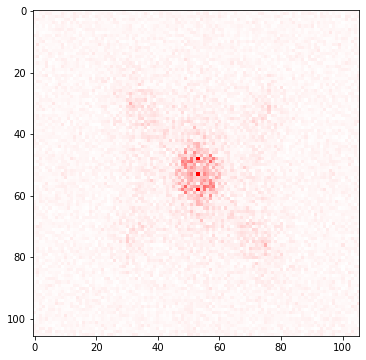

In [160]:
limit = 8000
fig = plt.figure(figsize = (6, 6))
plt.imshow(sea3, cmap='bwr', vmin = -1*limit, vmax = limit)

# for mat 6
# plt.plot([60, 64], [60, 56], color = 'green', linewidth = 1)
# plt.plot([64, 79], [56, 41], color = 'red', linewidth = 1)
# plt.plot([79, 83], [41, 37], color = 'blue', linewidth = 1)

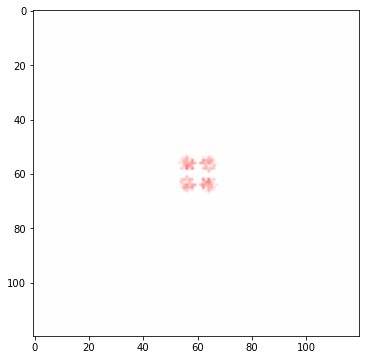

In [199]:
masked = np.zeros((dim,dim))
fig = plt.figure(figsize = (6, 6))
centers = [(64, 56), (64, 64), (56, 64), (56, 56)]
for i in range(dim):
    for j in range(dim):
        for cent in centers:
            if ((i - cent[0])**2 + (j - cent[1])**2) < 10:
                masked[i,j] = final7[i,j]
plt.imshow(masked, cmap='bwr', vmin = -1*limit, vmax = limit)

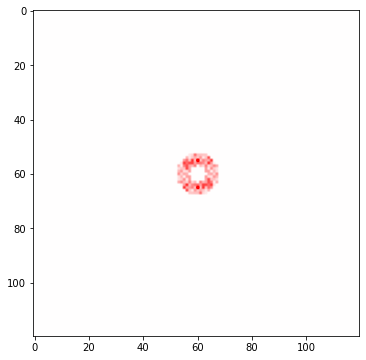

In [163]:
masked = np.zeros((dim,dim))
fig = plt.figure(figsize = (6, 6))
for i in range(dim):
    for j in range(dim):
        if ((i - 60)**2 + (j - 60)**2) > 9 and ((i - 60)**2 + (j - 60)**2) < 60:
            masked[i,j] = final7[i,j]
plt.imshow(masked, cmap='bwr', vmin = -1*limit, vmax = limit)

In [200]:
k = scipy.fft.ifftshift(masked)
k = scipy.fft.ifft2(k)

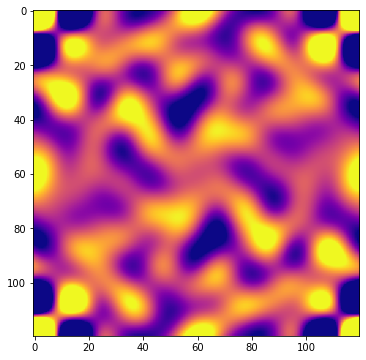

In [201]:
fig = plt.figure(figsize = (6, 6))
plt.imshow(np.real(k), cmap="plasma", vmax = 2, vmin = -2)

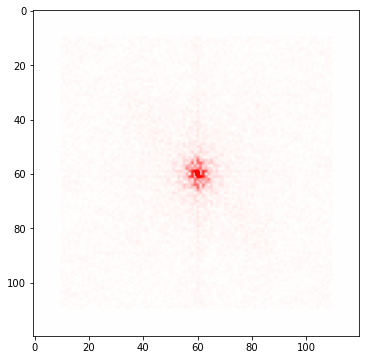

In [189]:
final7 = np.zeros((dim,dim))
sea3 = max_indexFOV[margin:dim-margin, margin:dim-margin]
sea3 = np.abs(ffourier(sea3))
final7[margin:dim-margin, margin:dim-margin] = sea3
fig = plt.figure(figsize = (6, 6))
plt.imshow(final7, cmap='bwr', vmin = -1*limit, vmax = limit)

In [211]:
pickle.dump(norm20, open(folder_name + "/20x20Norm20.pickle", "wb"))
pickle.dump(zscores, open(folder_name + "/20x20ZScores.pickle", "wb"))
pickle.dump(max_index, open(folder_name + "/20x20Max_Index.pickle", "wb"))